In [144]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
cap = cv2.VideoCapture('Jump.avi')
num_frames=0
ret=True
while(ret==True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    num_frames=num_frames+1
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #frame.shape
        
print(num_frames)

128


In [146]:
cap = cv2.VideoCapture('Jump.avi')
ret,frame=cap.read()
frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
fshape = frame.shape

In [147]:
num_labels = 2 #Foreground: person and background; person is index 0 and background is index 1
mu = np.zeros((fshape[0],fshape[1],num_labels))
sigma = np.zeros((fshape[0],fshape[1],num_labels))
weights = np.zeros((fshape[0],fshape[1],num_labels))
N = np.zeros((fshape[0],fshape[1],num_labels))
M = np.zeros((fshape[0],fshape[1],num_labels))
Z = np.zeros((fshape[0],fshape[1],num_labels))

In [148]:
mu.shape

(144, 180, 2)

In [149]:
#Gaussian function
def Gaussian(mu,sigma,x):
    b = (x-mu)*(x-mu)
    b = b*(-1/2)
    b = b/(sigma*sigma)
    b = np.exp(b)
    b = b/np.power(2*22/7,0.5)
    b = b/(sigma)
    return b

In [150]:
#Initialisation
weights[:,:,:]=0.5
sigma[:,:,:]=0.0784#Standard deviation 1 pixel
mu[:,:,1]=0.627
mu[:,:,0]=0.694
N=weights
M=np.multiply(weights,mu)
Z=np.multiply(weights,sigma+np.multiply(mu,mu))

In [151]:
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('output.avi', fourcc, 5.0, (fshape[0],fshape[1]))


In [152]:
#Parameter updation and backgroud detection using rest of the frames
k=0
#while(ret==True):
Prob_label = np.zeros((fshape[0],fshape[1],num_labels))
total_prob = np.zeros((fshape[0],fshape[1]))
temp=np.zeros((fshape[0],fshape[1],num_labels))
while(k<=50):
    ret, frame = cap.read()
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    labels = np.zeros((fshape[0],fshape[1]))#Full black
    print(k)
    for i in range(num_labels):
        total_prob = total_prob+(weights[:,:,i]*Gaussian(mu[:,:,i],sigma[:,:,i],frame))
    for i in range(num_labels):
        Prob_label[:,:,i] = weights[:,:,i]*Gaussian(mu[:,:,i],sigma[:,:,i],frame)/total_prob
    labels = np.argmax(Prob_label,axis=2)
    labels = labels*255.0
    #labels_cv = cv2.cvtColor(np.uint8(labels), cv2.COLOR_GRAY2BGR)
    #out.write(labels_cv)
    for i in range(num_labels):
        N[:,:,i]=N[:,:,i]+Prob_label[:,:,i]
        M[:,:,i]=M[:,:,i]+(Prob_label[:,:,i]*frame)
        Z[:,:,i]=Z[:,:,i]+(Prob_label[:,:,i]*frame*frame)
    for i in range(num_labels):
        temp[:,:,i]=np.ndarray.sum(N,axis=2)
    weights=N/temp
    mu=M/N
    sigma=(Z/N)-(mu*mu)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


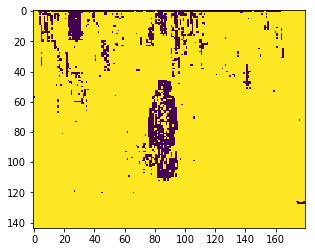

In [153]:
plt.imshow(labels)

In [154]:
#out.release()